**Este es un ejemplo de Kmeans para el funcionamiento del algortimo**

In [60]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [61]:
#Clase para el algoritmo KMeans
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        #Paso 1: Inicializar los centroides
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            #Paso 2: Asignar cada punto al centroide más cercano
            labels = self.assign_labels(X)

            #Paso 3: Actualizar los centroides
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            #Paso 4: Verificar convergencia
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels = self.assign_labels(X)
        return self
    
    def assign_labels(self, X):
        #Calcular la distancia de cada punto a cada centroide
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        #Asignar etiquetas segun la distancia minima
        return np.argmin(distances, axis=1)
            

Ejemplos de caso de uso

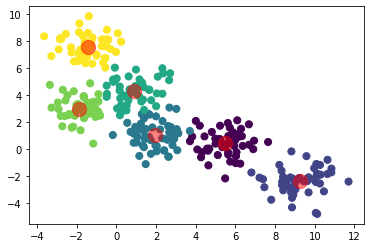

In [62]:

#Generar datos de prueba
X, _ = make_blobs(n_samples=300, centers=6, cluster_std=0.90, random_state=0)

#Aplicar el algoritmo KMeans
kmeans_custom = KMeans(n_clusters=6)
kmeans_custom.fit(X)
centroids = kmeans_custom.centroids
labels = kmeans_custom.labels

#Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

Usar la base de datos de Iris para el Kmeans como parte de la practica.